# Sarima Model


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Random data cant be taken as sequence is the most important thing in time series analysis
gold1 = pd.read_csv("C:/Users/Aboli/Downloads/Gold_data (2).csv",index_col=0,parse_dates=True)
Train = gold1.head(1855)
Test = gold1.tail(327)


In [3]:
model = sm.tsa.statespace.SARIMAX(Train['price'],order=(0, 1, 2), seasonal_order=(0,1,2,31)) 

C:\Users\Aboli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Aboli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [4]:
results= model.fit()
Train['forecast']=results.predict(start=1, end=1856) 


C:\Users\Aboli\AppData\Local\Temp/ipykernel_19060/1887087894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['forecast']=results.predict(start=1, end=1856)


<AxesSubplot:xlabel='date'>

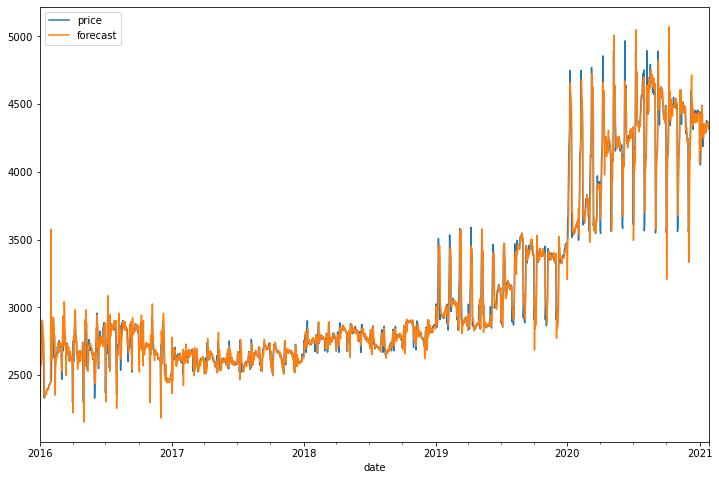

In [5]:
Train[['price', 'forecast']].plot(figsize=(12,8))

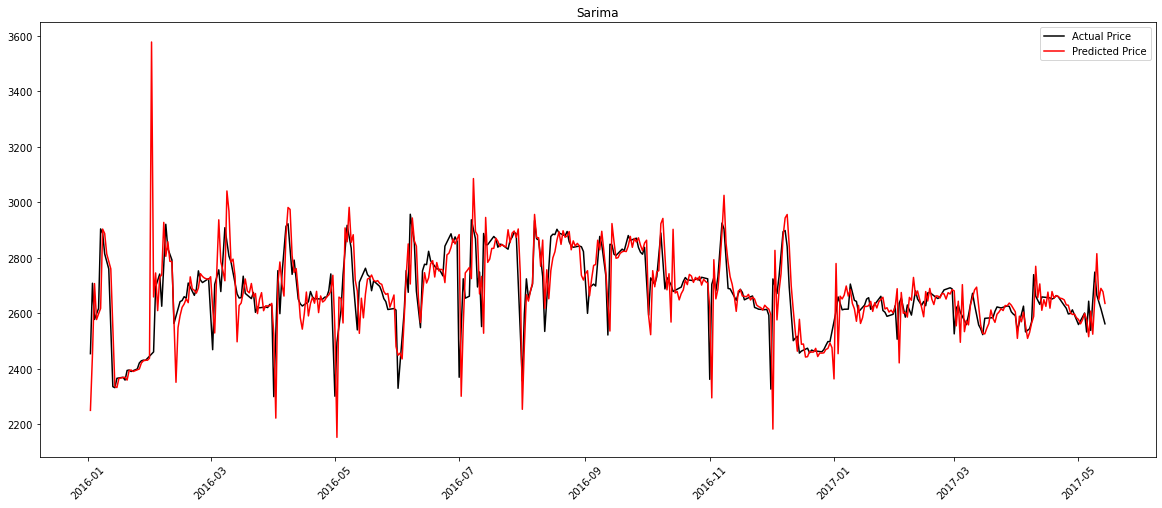

In [6]:
plt.figure(figsize=(20,8))
plt.title("Sarima")
plt.xticks(rotation=45)
plt.plot(Train.price[1:500], color='black',label='Actual Price')
plt.plot(results.fittedvalues[1:500],color='red', label='Predicted Price')
plt.legend()

In [7]:
from pandas.tseries.offsets import DateOffset

In [8]:
pred_date=[Train.index[-1]+ pd.DateOffset(days=x)for x in range(0,30)]
pred_date=pd.DataFrame(index=pred_date[1:],columns=Train.columns)
pred_date

,price,forecast
2021-01-29,NaN,NaN
2021-01-30,NaN,NaN
2021-01-31,NaN,NaN
2021-02-01,NaN,NaN
2021-02-02,NaN,NaN
2021-02-03,NaN,NaN
2021-02-04,NaN,NaN
2021-02-05,NaN,NaN
2021-02-06,NaN,NaN
2021-02-07,NaN,NaN


In [9]:
Train=pd.concat([Train,pred_date])

<AxesSubplot:>

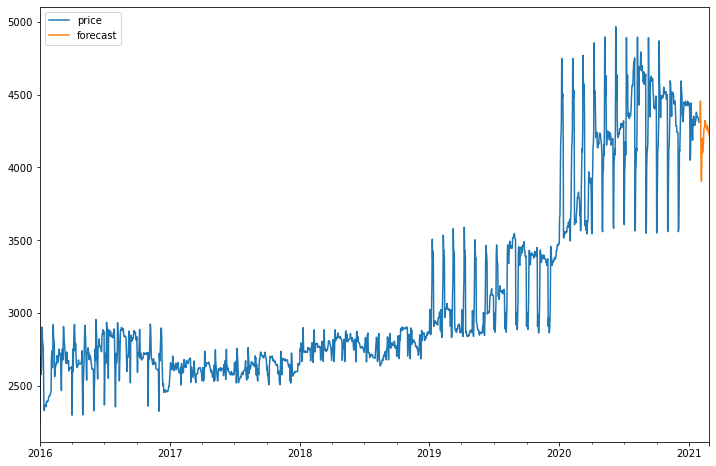

In [10]:
Train['forecast'] = results.predict(start =1855, end = 2183)  
Train[['price', 'forecast']].plot(figsize=(12, 8))

In [11]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,  
            'corr':corr, 'minmax':minmax})
t=Train.forecast.tail(327).array
forecast_accuracy(t,Test.price.head(327))

C:\Users\Aboli\AppData\Local\Temp/ipykernel_19060/1419083264.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
C:\Users\Aboli\AppData\Local\Temp/ipykernel_19060/1419083264.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


{'mape': 0.02790372595056082,
 'me': -76.21000496559164,
 'mae': 120.41810078172017,
 'mpe': -0.017416021962263405,
 'rmse': 147.10939217917849,
 'corr': nan,
 'minmax': nan}

# Predicting Values


In [12]:
Final_model = sm.tsa.statespace.SARIMAX(gold1['price'],order=(0, 1, 2), seasonal_order=(0,1,2,31)) 
results1= Final_model.fit()
gold1['forecast']=results1.predict(start=1332, end=2183) 


C:\Users\Aboli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Aboli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='date'>

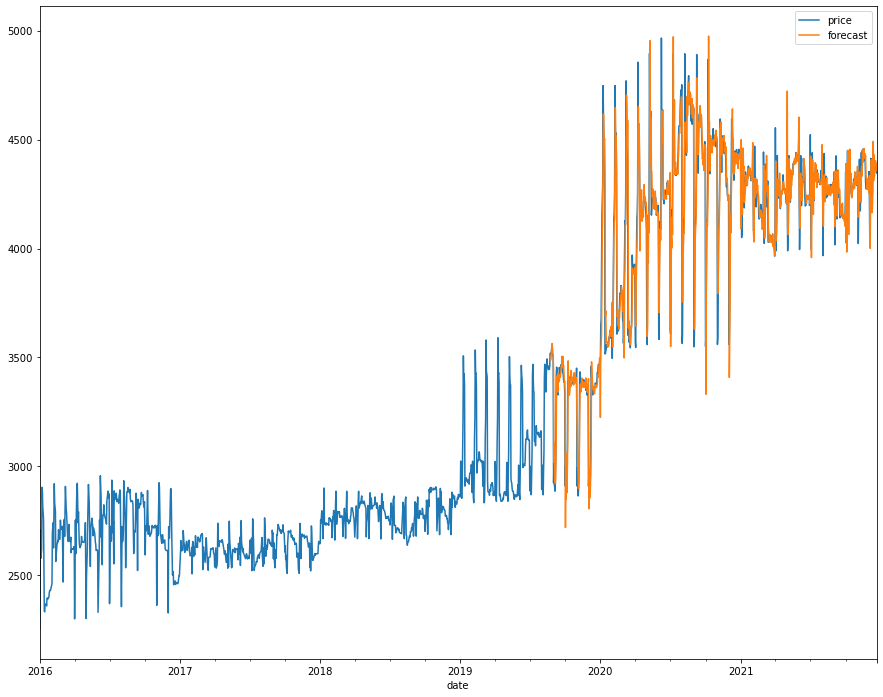

In [13]:
gold1[['price', 'forecast']].plot(figsize=(15,12))

In [14]:
from pandas.tseries.offsets import DateOffset

In [15]:
pred_date=[Test.index[-1]+ pd.DateOffset(days=x)for x in range(0,30)]

In [16]:
pred_date=pd.DataFrame(index=pred_date[1:],columns=gold1.columns)


In [17]:
pred_date

,price,forecast
2021-12-22,NaN,NaN
2021-12-23,NaN,NaN
2021-12-24,NaN,NaN
2021-12-25,NaN,NaN
2021-12-26,NaN,NaN
2021-12-27,NaN,NaN
2021-12-28,NaN,NaN
2021-12-29,NaN,NaN
2021-12-30,NaN,NaN
2021-12-31,NaN,NaN


In [18]:
gold1=pd.concat([gold1,pred_date])

<AxesSubplot:>

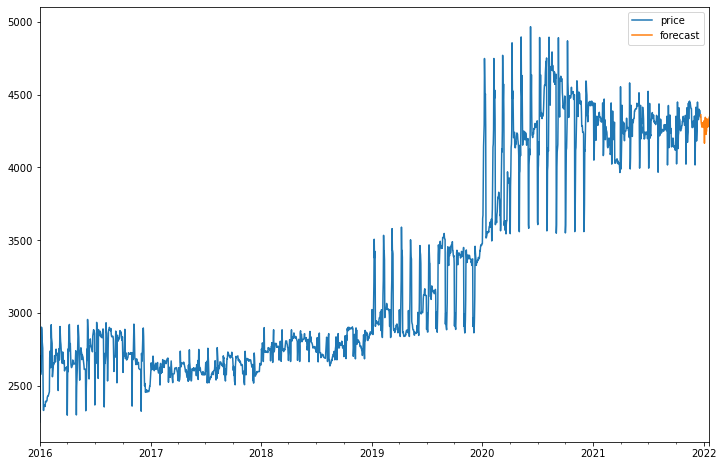

In [19]:
gold1['forecast'] = results1.predict(start =2182 , end = 2214)  
gold1[['price', 'forecast']].plot(figsize=(12, 8))

In [20]:
print(results1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              price   No. Observations:                 2182
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 31)   Log Likelihood              -12991.203
Date:                            Mon, 02 May 2022   AIC                          25992.406
Time:                                    13:30:17   BIC                          26020.772
Sample:                                01-01-2016   HQIC                         26002.783
                                     - 12-21-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1595      0.013    -12.526      0.000      -0.184      -0.135
ma.L2         -0.2054      0.017   

In [21]:
conf_ins = results1.get_forecast(30).summary_frame()
conf_ins = pd.DataFrame(conf_ins)
conf_ins

price,mean,mean_se,mean_ci_lower,mean_ci_upper
2021-12-22,4361.370508,99.839215,4165.689243,4557.051774
2021-12-23,4317.473694,130.421092,4061.853051,4573.094337
2021-12-24,4299.144283,145.019464,4014.911356,4583.377210
2021-12-25,4288.192033,158.277059,3977.974698,4598.409368
2021-12-26,4276.488106,170.506917,3942.300689,4610.675522
2021-12-27,4307.719436,181.916437,3951.169771,4664.269101
2021-12-28,4303.559735,192.651425,3925.969880,4681.149589
2021-12-29,4302.519474,202.819015,3905.001509,4700.037439
2021-12-30,4285.664412,212.500669,3869.170754,4702.158069
2021-12-31,4275.232004,221.760041,3840.590311,4709.873697
